In [ ]:
import geopandas as gpd
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

paradas_path = '/content/v_paradas_suburbanos.shp'

paradas = gpd.read_file(paradas_path)
paradas.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gid,codigo,descrip,calle_1,calle_2,km,observ,cartel,refugio,lineas,geometry
0,5306,15001,TERMINAL B.BRUM,GALICIA,RIO BRANCO,NaN,None,SD,SD,10A-11A-11C-14A-14AB-14AR-15A-15B-1A-1M1-1M11-...,POINT (-56.19659 -34.90013)
1,5307,15031,RIO NEGRO,PAYSANDU,RIO NEGRO,NaN,None,SD,SD,11A-15A-15B-214-221-222-268-6A-6R6-700-701-702...,POINT (-56.19423 -34.90238)
2,5308,15032,AV. LIBERTADOR,PAYSANDU,AV. LIBERTADOR,NaN,None,SD,SD,10A-11A-11C-14A-14AB-14AR-15A-15B-1A-1M8-268-2...,POINT (-56.19305 -34.90229)
3,5309,15033,YAGUARON,PAYSANDU,YAGUARON,NaN,None,SD,SD,11A-11C-15A-15B-214-221-222-6A-6B-6R6-700-701-...,POINT (-56.18862 -34.90197)
4,5310,15034,EJIDO,PAYSANDU,EJIDO,NaN,None,SD,SD,10A-11A-11C-14A-14AB-14AR-15A-15B-1A-1M8-230D-...,POINT (-56.1875 -34.90187)


In [ ]:
paradas.columns

Index(['gid', 'codigo', 'descrip', 'calle_1', 'calle_2', 'km', 'observ',
       'cartel', 'refugio', 'lineas', 'geometry'],
      dtype='object')

In [ ]:
localidades = gpd.read_file('/content/merged_localidades.csv')
localidades.head()

,LOCALIDAD_CODE,DEPARTAMENTO,size,DPTOLOC_COD,LOC_NOMBRE,DPTO_CODIGO,DPTO_NOMBRE,LAT,LON
0,17900,17,4986,17900,RURAL/PARAJE RURAL,17,Soriano,,
1,11951,11,4963,11951,CHACRAS DE PAYSANDU,11,Paysandú,-32.3438623,-58.0086687
2,11900,11,4662,11900,RURAL/PARAJE RURAL,11,Paysandú,,
3,10973,10,4612,10973,BALNEARIO BUENOS AIRES,10,Maldonado,-34.8874624,-54.793618
4,10944,10,4592,10944,LA CAPUERA,10,Maldonado,-34.8525158,-55.1276144


In [ ]:
# Convert the 'LAT' column to numeric, coercing errors to NaN
localidades['LAT'] = pd.to_numeric(localidades['LAT'], errors='coerce')

# Filter rows where 'LAT' is less than -1, dropping rows with NaN in LAT
localidades_filtered = localidades[localidades["LAT"] < -1].dropna(subset=['LAT'])

localidades_filtered

,LOCALIDAD_CODE,DEPARTAMENTO,size,DPTOLOC_COD,LOC_NOMBRE,DPTO_CODIGO,DPTO_NOMBRE,LAT,LON
1,11951,11,4963,11951,CHACRAS DE PAYSANDU,11,Paysandú,-32.343862,-58.0086687
3,10973,10,4612,10973,BALNEARIO BUENOS AIRES,10,Maldonado,-34.887462,-54.793618
4,10944,10,4592,10944,LA CAPUERA,10,Maldonado,-34.852516,-55.1276144
6,19522,19,3960,19522,VERGARA,19,Treinta y Tres,-32.937673,-53.9377544
7,13621,13,3919,13621,VICHADERO,13,Rivera,-31.778955,-54.6923583
...,...,...,...,...,...,...,...,...,...
199,18992,18,107,18992,PUNTA DE CARRETERA,18,Tacuarembó,-32.082900,-55.1856476
200,15945,15,107,15945,LAURELES,15,Salto,-31.498759,-57.5259895
201,12825,12,106,12825,SAUCE,12,Río Negro,-33.012662,-57.3464366
202,10990,10,105,10990,PUEBLO MIO,10,Maldonado,-34.870124,-54.8368756


In [ ]:
print(localidades.shape[0])
print(localidades_filtered.shape[0])

204
186


In [ ]:
camineraia_nacional_path = '/content/v_camineria_nacional.shp'
camineria = gpd.read_file(camineraia_nacional_path)
camineria.head()

,gid,codigo,numero,nombre,depto,jurisdicci,categoria,sentido,carriles,calzada,fuente,observacio,nat_juridi,geometry
0,3344250,UY0110000,11.0,José Batlle y Ordoñez,UYCA,NACIONAL,CORREDOR INTERNACIONAL,EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...,1,SE VE CALZADA,VFN,7-11,None,"LINESTRING (-55.87298 -34.54738, -55.87303 -34..."
1,349731,UY0110000,11.0,José Batlle y Ordoñez,UYCA,NACIONAL,CORREDOR INTERNACIONAL,CIRCULACIÓN EN AMBOS SENTIDOS,2,SE VE CALZADA,VFN,None,None,"LINESTRING (-56.0249 -34.51454, -56.02669 -34...."
2,292738,UY0270000,27.0,Mario Heber,UYRV,NACIONAL,RUTA SECUNDARIA,CIRCULACIÓN EN AMBOS SENTIDOS,2,SE VE CALZADA,VFN,None,None,"LINESTRING (-55.49775 -31.0364, -55.47293 -31...."
3,305834,UY0050000,5.0,Brig. Gral. Fructuoso Rivera,UYMO,NACIONAL,CORREDOR INTERNACIONAL,EL SENTIDO DE CIRCULACIÓN COINCIDE CON EL DE D...,2,SE VE CALZADA,VFN,None,None,"LINESTRING (-56.27475 -34.78458, -56.27479 -34..."
4,3343102,UYTA0284,NaN,None,UYTA,SIN DEFINIR,CAMINERÍA DEPARTAMENTAL,CIRCULACIÓN EN AMBOS SENTIDOS,99,SE VE HUELLA,VFN,None,None,"LINESTRING (-55.88549 -31.79666, -55.88545 -31..."


In [ ]:
import geopandas as gpd

# Ensure LAT and LON are numeric (already done in a previous cell but good to be safe)
localidades['LAT'] = pd.to_numeric(localidades['LAT'], errors='coerce')
localidades['LON'] = pd.to_numeric(localidades['LON'], errors='coerce')

# Drop rows where LAT or LON are NaN after coercion
localidades_with_coords = localidades.dropna(subset=['LAT', 'LON']).copy()

# Create a GeoDataFrame from the filtered DataFrame
# Assuming the coordinates are in WGS84 (EPSG:4326)
localidades_gdf = gpd.GeoDataFrame(
    localidades_with_coords,
    geometry=gpd.points_from_xy(localidades_with_coords.LON, localidades_with_coords.LAT),
    crs="EPSG:4326"
)
localidades_gdf.drop(columns=['LON', 'LAT'], inplace=True)

localidades_gdf.head()

,LOCALIDAD_CODE,DEPARTAMENTO,size,DPTOLOC_COD,LOC_NOMBRE,DPTO_CODIGO,DPTO_NOMBRE,geometry
1,11951,11,4963,11951,CHACRAS DE PAYSANDU,11,Paysandú,POINT (-58.00867 -32.34386)
3,10973,10,4612,10973,BALNEARIO BUENOS AIRES,10,Maldonado,POINT (-54.79362 -34.88746)
4,10944,10,4592,10944,LA CAPUERA,10,Maldonado,POINT (-55.12761 -34.85252)
6,19522,19,3960,19522,VERGARA,19,Treinta y Tres,POINT (-53.93775 -32.93767)
7,13621,13,3919,13621,VICHADERO,13,Rivera,POINT (-54.69236 -31.77896)


In [ ]:
print("cantidad de localidades",localidades_gdf.shape[0])
print("cantidad de paradas",paradas.shape[0])
print("cantidad de rutas",len(camineria["numero"].unique()))


cantidad de localidades 186
cantidad de paradas 5674
cantidad de rutas 126


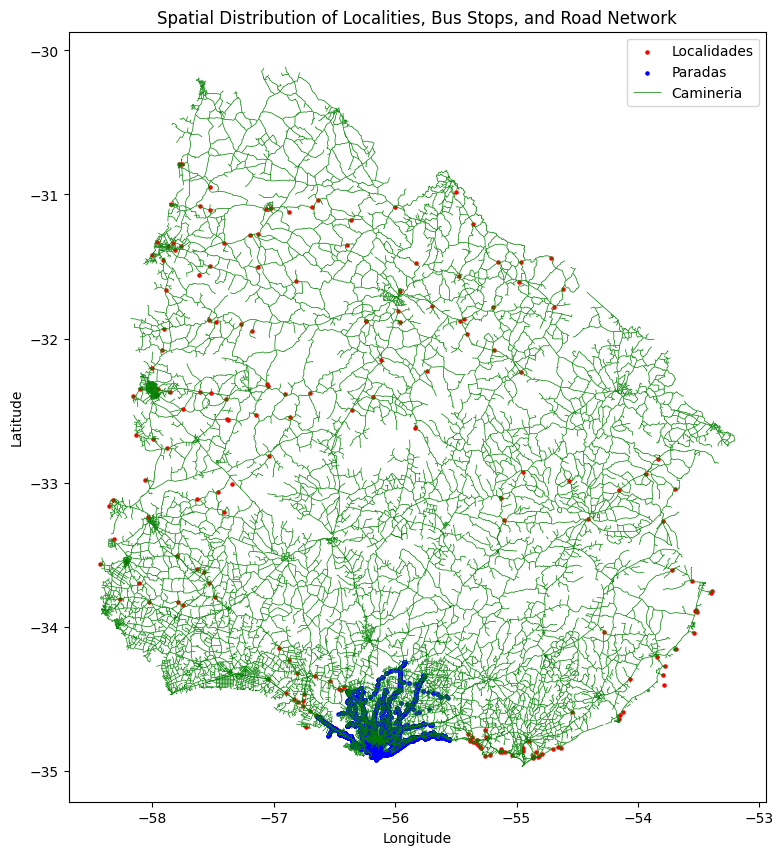

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot each GeoDataFrame with a different color and label
localidades_gdf.plot(ax=ax, color='red', label='Localidades', markersize=5)
paradas.plot(ax=ax, color='blue', label='Paradas', markersize=5)
camineria.plot(ax=ax, color='green', label='Camineria', linewidth=0.5)

# Add a legend and title
ax.set_title('Spatial Distribution of Localities, Bus Stops, and Road Network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()

#Comentarios

* Considerar todas las localidades, no solo las de menos de 5 mil habitantes.
* Las paradas parece que son solo en zona metropolitana, capaz que no es util, considerar otro dataset (arreglado usando los datos de overpass)
* Considerar todas las rutas como en el mapa en verde, util para medir las distancias, se puede pedir como requerimiento que las paradas se ubiquen sobre ciertas rutas para el scoring.

In [ ]:
import geopandas as gpd

# Assuming the file is a GeoJSON in your Google Drive
# You might need to adjust the path based on where your file is located
paradas_omnibus_path = '/content/Paradas_omnibus_UY.geojson'

paradas_omnibus = gpd.read_file(paradas_omnibus_path)

In [ ]:
paradas_omnibus.columns

Index(['id', '@id', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:street', 'amenity', 'bench', 'bin', 'bus', 'bus_stop:category',
       'check_date:bench', 'check_date:shelter', 'covered', 'departures_board',
       'description', 'highway', 'internet_access', 'lit', 'mapillary',
       'mvdgis:cod_nombre', 'mvdgis:cod_varian', 'mvdgis:desc_linea',
       'mvdgis:ordinal', 'mvdgis:padron', 'mvdgis:source', 'name', 'name:de',
       'name:en', 'name:es', 'name:signed', 'network', 'network:wikidata',
       'network:wikipedia', 'noname', 'not:network:wikidata', 'note',
       'operator', 'owner', 'passenger_information_display', 'phone',
       'public_transport', 'ref', 'route_ref', 'shelter', 'shelter_type',
       'source', 'source:pkey', 'survey:date', 'tactile_paving', 'wheelchair',
       'geometry'],
      dtype='object')

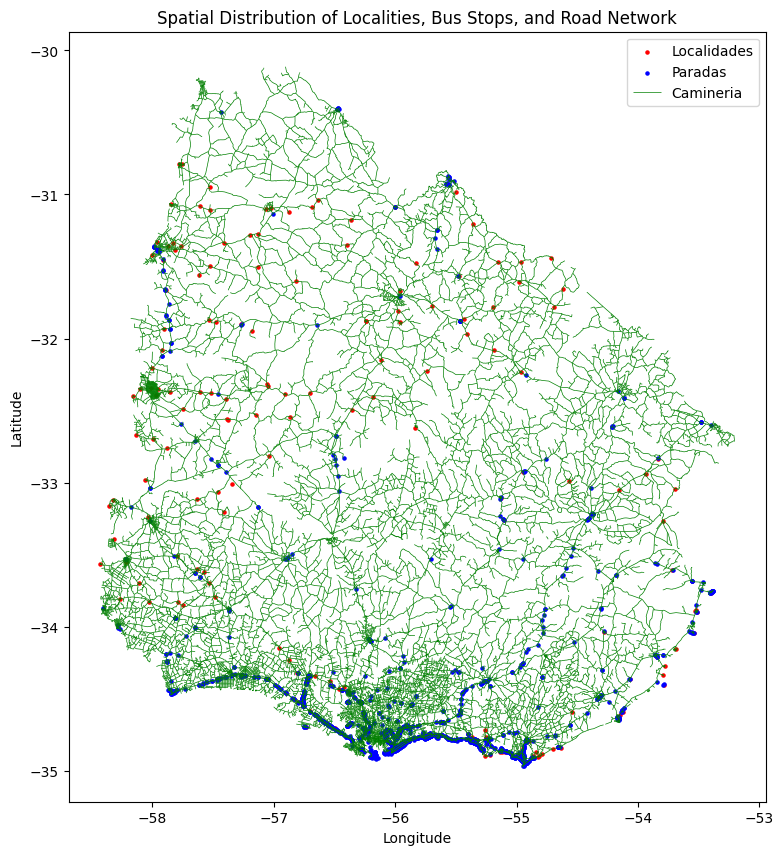

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot each GeoDataFrame with a different color and label
localidades_gdf.plot(ax=ax, color='red', label='Localidades', markersize=5)
paradas_omnibus.plot(ax=ax, color='blue', label='Paradas', markersize=5)
camineria.plot(ax=ax, color='green', label='Camineria', linewidth=0.5)

# Add a legend and title
ax.set_title('Spatial Distribution of Localities, Bus Stops, and Road Network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()

# identificacion de paradas

In [ ]:
import requests

def pedir_imagen(lat, lon, z):
  TOKEN = "pk.eyJ1IjoicG1hdXJlbnRlIiwiYSI6ImNtZG93NnQzeTA2aXgyam90dG9hYWtqYWcifQ.2fsPp-bXI3MyvkTCTIGg1Q"
  for i in range(15,19):
    lat, lon = lat, lon
    zoom, width, height = z, 512, 512
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},{zoom}/{width}x{height}"
        f"?access_token={TOKEN}"
    )

    resp = requests.get(url)
    assert resp.status_code == 200, f"Error HTTP {resp.status_code}"
    return resp.content

In [ ]:
import os

# Carpeta donde se guardarán las imágenes
output_dir = '/content/paradas_images'
os.makedirs(output_dir, exist_ok=True)


In [ ]:
# Define the zoom levels to download
zoom_levels = [15, 16, 17, 18, 19]

# Iterate through the example stops
for i, stop in paradas_omnibus.iterrows():
    lat = stop.geometry.y
    lon = stop.geometry.x

    # Iterate through the zoom levels
    for z in zoom_levels:
        try:
            print(f"Attempting to download image for Stop {i} at zoom level {z}...")
            image_content = pedir_imagen(lat, lon, z)

            # Save the image
            # ...
            filename = os.path.join(output_dir, f"stop_{i}_zoom_{z}.png")
            with open(filename, "wb") as f:
                f.write(image_content)
            print(f"Downloaded: {filename}")

        except Exception as e:
            print(f"Could not download image for Stop {i} at zoom level {z}: {e}")

print("\nFinished attempting to download images for example stops.")

Streaming output truncated to the last 5000 lines.
Attempting to download image for Stop 1251 at zoom level 16...
Downloaded: /content/paradas_images/stop_1251_zoom_16.png
Attempting to download image for Stop 1251 at zoom level 17...
Downloaded: /content/paradas_images/stop_1251_zoom_17.png
Attempting to download image for Stop 1251 at zoom level 18...
Downloaded: /content/paradas_images/stop_1251_zoom_18.png
Attempting to download image for Stop 1251 at zoom level 19...
Downloaded: /content/paradas_images/stop_1251_zoom_19.png
Attempting to download image for Stop 1252 at zoom level 15...
Downloaded: /content/paradas_images/stop_1252_zoom_15.png
Attempting to download image for Stop 1252 at zoom level 16...
Downloaded: /content/paradas_images/stop_1252_zoom_16.png
Attempting to download image for Stop 1252 at zoom level 17...
Downloaded: /content/paradas_images/stop_1252_zoom_17.png
Attempting to download image for Stop 1252 at zoom level 18...
Downloaded: /content/paradas_images/sto

In [ ]:
import os
from google.colab import files
import shutil

folder_path = '/content/paradas_images'
zip_path = '/content/paradas_images.zip'

# Check if the folder exists
if os.path.exists(folder_path):
    print(f"Compressing folder: {folder_path}")
    # Create a zip archive of the folder
    shutil.make_archive(folder_path, 'zip', folder_path)
    print(f"Created zip file: {zip_path}")

    # Download the zip file
    print(f"Downloading {zip_path}...")
    files.download(zip_path)
    print("Download initiated.")
else:
    print(f"Error: Folder not found at {folder_path}. Please verify the path.")

Compressing folder: /content/paradas_images
Created zip file: /content/paradas_images.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated.
